In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class HOGFeatureValue:        
    def quantize(self, value):
        res = np.floor(value / 20)
        if res >= 9: res = 8
        return res
    
    def calc_gx_gy(self, img):
        input_img = img.copy().astype(np.int32)
        H, W = input_img.shape
        gx = np.zeros_like(input_img).astype(np.int32)
        gy = np.zeros_like(input_img).astype(np.int32)
        for y in range(H):
            for x in range(W):
                gx[y, x] = input_img[y, min(x+1, W-1)] - input_img[y, max(x-1, 0)]
                gy[y, x] = input_img[min(y+1, H-1), x] - input_img[max(y-1, 0), x]
        return gx, gy
    
    def calc_mag_ang(self, gx, gy):
        H, W = gx.shape
        mag = np.zeros_like(gx, dtype=np.float32)
        ang = np.zeros_like(gy, dtype=np.float32)
        for y in range(H):
            for x in range(W):
                mag[y, x] = np.sqrt(gx[y, x]**2 + gy[y, x]**2)
                ang[y, x] = np.arctan2(gy[y, x], gx[y, x])
                if ang[y, x] < 0: ang[y, x] += np.pi
                ang[y, x] = self.quantize(ang[y, x] / np.pi * 180.0)
        ang = ang.astype(np.uint8)
        return mag, ang
                
    def get_colorized_ang(self, ang):
        color = [
            [255, 0, 0],
            [0, 255, 0],
            [0, 0, 255],
            [255, 255, 0],
            [255, 0, 255],
            [0, 255, 255],
            [127, 127, 0],
            [127, 0, 127],
            [0, 127, 127],
        ]
        H, W = ang.shape
        colorized_ang = np.zeros((H, W, 3), dtype=np.uint8)
        for i in range(9):
            colorized_ang[ang == i] = color[i]
        return colorized_ang

In [5]:
class Solver:
    def __init__(self):
        self.hog = HOGFeatureValue()
    
    def problem_66(self, input_img):
        input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY).astype(np.int8)
        gx, gy = self.hog.calc_gx_gy(input_img_gray)
        mag, ang = self.hog.calc_mag_ang(gx, gy)
        plt.subplot(1, 2, 1)
        plt.imshow(mag, cmap="gray")
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(self.hog.get_colorized_ang(ang), cv2.COLOR_BGR2RGB))
        plt.show()

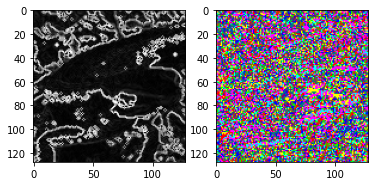

In [6]:
img = cv2.imread("../imori.jpg")
solver = Solver()
solver.problem_66(img)